In [9]:
import numpy as np
import matplotlib.pyplot as plt
tin = 0
tfinal = 1
nstep = 20000
tstep = (tfinal - tin)/nstep

欧拉法

In [10]:
def euler():
    u = np.zeros(nstep + 1)
    y = np.zeros(nstep + 1)
    u[0] = 1
    y[0] = 0
    for i in range(nstep):
        y[i+1] = y[i] + tstep * (-u[i])
        u[i+1] = u[i] + tstep * (y[i])
    return u,y

二阶差分法

In [14]:
def calc2():
    u = np.zeros(nstep + 1)
    y = np.zeros(nstep + 1)
    u[0] = 1
    y[0] = 0
    u[1] = u[0] + tstep * y[0]
    for i in range(2,nstep+1):
        u[i] = (2-tstep**2)*u[i-1] - u[i-2]
    for i in range(nstep):
        y[i+1] = y[i] + tstep * (-u[i])
    return u,y

rk4

In [20]:
def yt(y,u):
    return -u
def ut(y,u):
    return y

def calc3():
    u = np.zeros(nstep + 1)
    y = np.zeros(nstep + 1)
    u[0] = 1
    y[0] = 0
    for i in range(1,nstep+1):
        yk1 = yt(y[i-1],u[i-1])
        uk1 = ut(y[i-1],u[i-1])

        yk2 = yt(y[i-1]+tstep*yk1/2,u[i-1])
        uk2 = ut(y[i-1],u[i-1]+tstep*uk1/2)

        yk3 = yt(y[i-1]+tstep*yk2/2,u[i-1])
        uk3 = ut(y[i-1],u[i-1]+tstep*uk2/2)

        yk4 = yt(y[i-1]+tstep*yk3/2,u[i-1])
        uk4 = ut(y[i-1],u[i-1]+tstep*uk3/2)

        y[i] = y[i-1]+tstep*(yk1+2*yk2+2*yk3+yk4)/6
        u[i] = u[i-1]+tstep*(uk1+2*uk2+2*uk3+uk4)/6
    return u,y

In [21]:
u1,y1 = euler()
u2,y2 = calc2()
u3,y3 = calc3()

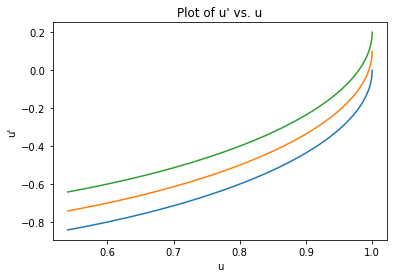

In [23]:
plt.plot(u1, y1)
plt.plot(u2,y2+0.1)
plt.plot(u3,y3+0.2)
plt.xlabel('u')
plt.ylabel("u'")
plt.title("Plot of u' vs. u")
plt.show()